# 01. Data Collection – Stock Price Forecasting

This notebook covers the data collection stage for our stock price forecasting project.
We will download historical stock data, clean it, and save it for further processing.


## 1. Objective

- Predict future stock prices using historical stock data.
- Target variable: Closing price (`Close`).
- Stock symbol: Apple (AAPL)
- Timeframe: 2018-01-01 to 2025-01-01
- Frequency: Daily


## 2. Data Source

We will use Yahoo Finance through the `yfinance` Python library:

- Free and easy to access.
- Provides historical stock prices: Open, High, Low, Close, Adj Close, Volume.


In [11]:
# Install yfinance if not already installed
# !pip install yfinance pandas matplotlib

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import os


## 3. Fetch Historical Stock Data

We will download AAPL stock data from 2018-01-01 to 2025-01-01.


In [12]:
ticker = "AAPL"
start_date = "2018-01-01"
end_date = "2025-01-01"

data = yf.download(ticker, start=start_date, end=end_date, progress=False)
data.reset_index(inplace=True)

# Flatten columns if MultiIndex
if isinstance(data.columns, pd.MultiIndex):
    data.columns = [col[0] if col[0] != 'Date' else 'Date' for col in data.columns]

# Keep only relevant columns
columns_to_keep = [col for col in ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'] if col in data.columns]
data = data[columns_to_keep]

data.head()


/var/folders/nt/s3m5h81n5rn92c8fs2mqq_pr0000gn/T/ipykernel_39623/2752310126.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


,Date,Open,High,Low,Close,Volume
0,2018-01-02,39.888723,40.390379,39.677744,40.381001,102223600
1,2018-01-03,40.444293,40.917820,40.310676,40.373966,118071600
2,2018-01-04,40.446638,40.664649,40.338807,40.561504,89738400
3,2018-01-05,40.657607,41.110034,40.566184,41.023300,94640000
4,2018-01-08,40.870930,41.166296,40.772471,40.870930,82271200


## 4. Save Raw Data

We save the cleaned raw data to a CSV file for reproducibility.


In [15]:
save_path = "../data/raw"
os.makedirs(save_path, exist_ok=True)
file_path = os.path.join(save_path, f"{ticker}_historical.csv")
data.to_csv(file_path, index=False)
print(f"Data saved to {file_path}")


Data saved to ../data/raw/AAPL_historical.csv


## 5. Initial Visualization

We plot the closing prices to inspect trends and patterns before modeling.


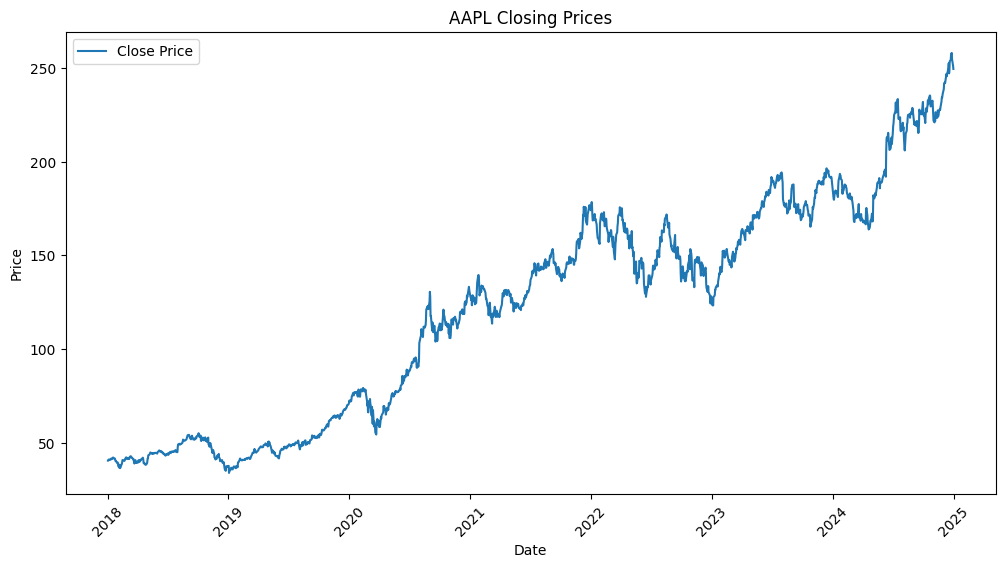

In [16]:
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{ticker} Closing Prices')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## 6. Summary

- We successfully fetched AAPL stock data from Yahoo Finance.
- Cleaned and saved the data as `data/raw/AAPL_historical.csv`.
- Visualized closing prices to check trends.
- The data is now ready for feature engineering and model training.